## Fire images 

The fire image dataset used in this project is primarily from the following link: 

https://drive.google.com/file/d/11KBgD_W2yOxhJnUMiyBkBzXDPXhVmvCt/view

This dataset contains 1405 images of fires. There are mostly urban fire and few wild fire. 

But the data is not cleaned. It contains many images without fire: site before and after fire, fire fighters and their equipment only, map of the area of fire, cartoon of fire etc. 

-- All the black and white images are removed. 

-- All images without fire or smoke are removed. 

It was a challenge whether or not to keep the picture involving fire damage and lots of ash. Ash might be the indication that there was a fire. But as a fire dectedion tool there might be little interest on the post damage picture. So I decided to remove those pictures. 

After removing all the irrelevant images we retin ......... images in our dataset. 

There is non-fire images in this dataset. 


And also from this link: 

https://www.kaggle.com/phylake1337/fire-dataset


There are mostly wild fire and few urban fire. 

This dataset contains 755 images containing fire and 244 images without fire. Clearly, there is disparity in number of images in two categories. Also, the fire images mostly contains wild fire and few urban fire. However, the non-fire images are mostly forest images. The significant amount of fire images are taken at night while the non-fire images are taken on day. So, non-fire dataset is not representative. So, I use non-fire dataset from other sources to make it more representative.

png to jpg conversion was done in 

https://www.youtube.com/watch?v=FGr3N3DLGEI


Third fire images are taken from 

https://github.com/cair/Fire-Detection-Image-Dataset/find/master



So we have 1650 fire images in total. 

# Non-fire images


I use this dataset for the non-fire images.  

https://people.csail.mit.edu/torralba/code/spatialenvelope/

There are 2688 images in various categories: coast, forest, highway, city, mountain, land, street, tall building etc and their subcategories. 

But almost all images are taken at day. This produce the risk, especially for night images with urban artificial light to mis-classify as fire images. So, I need another dataset containing night images without fire. 

.........................................................



Night images are taken from 

https://www.visuallocalization.net/datasets/

These are all urban night image. There are 93 such images. 




In [21]:
import os
import shutil
import random 
import glob
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # to view color image 
%matplotlib inline

In [2]:
base_dir = 'D:/Projects/Fire_detection'

src_fire = glob.glob(base_dir + '/Fire_set_*')
src_nofire = glob.glob(base_dir + '/Nofire_set_*')

dst_fire = os.path.join(base_dir, 'fire_images')
if not os.path.exists(dst_fire):
    os.makedirs(dst_fire)
    
dst_nofire = os.path.join(base_dir, 'nofire_images')
if not os.path.exists(dst_nofire):
    os.makedirs(dst_nofire)

In [3]:
def copy_file(src_path, dst_path, shuffle=False, no_modify=True, \
              start_index=None, end_index=None):
    
    '''This function copies files from src_path to dst_path.
    It copies files from start_index to end_index.
    shuffling can be activated to copy random files
    rather than first in the list.
    If modify=True, This function converts images to 
    RGB format and .jpg type before copying if they 
    are not already.'''
    
    # All files in src_path
    src_files = os.listdir(src_path)
    
    # Shuffle files before copying 
    if shuffle==True:
        random.shuffle(src_files)
    
    # Prepare directory to copy files 
    os.chdir(dst_path)
    
    # Copy from source to destination    
        
    for fname in src_files[start_index : end_index]:
        src = os.path.join(src_path, fname)
        
        if no_modify:
            dst = os.path.join(dst_path, fname)
            shutil.copyfile(src, dst)
  
        # option to change file format and extension etc.
        else:
            img = Image.open(src)  
            
            # Convert all images in RGB mode 
            if img.mode != 'RGB':
                # PIL cannot convert P to RGB directly. 
                if img.mode == 'P':    
                    img = img.convert('RGBA').convert('RGB')
                else: 
                    img = img.convert('RGB')

            # Convert all images in .jpg format 
            if fname.endswith('.jpg'):
                dst = os.path.join(dst_path, fname)
                shutil.copyfile(src, dst)
            else:
                fn, fext = os.path.splitext(fname)
                img.save('{}.jpg'.format(fn))

I want to include all the night images to the non-fire image set but only 1557 day images to match the toal to the fire images of 1650. Since, there are sub-categories non day images I would shuffle the list before copying to the destination folder. There is no need to shuffle in other case because we are copying all the images from there. 

In [4]:
copy_file(src_fire[0], dst_fire, no_modify=False)
copy_file(src_fire[1], dst_fire, no_modify=False)
copy_file(src_fire[2], dst_fire, no_modify=False)

In [9]:
# os.chdir(src_nofire[0])
# os.remove('Thumbs.db')

In [15]:
copy_file(src_nofire[0], dst_nofire, shuffle=True,\
          no_modify=False, end_index=1600)

And finally we want to shuffle the files in final destination and rename them appropriately. This is necessary because we are going to separate the fiels in the train and test set and shuffling makes the separation more representative. 

In [16]:
def file_rename(path, name):
    
    '''This functions renames all the .jpg 
    files in path in name.#.jpg format. 
    name should be passed as string. 
    Files are shuffled before renaming.'''
    
    files = os.listdir(path)
    random.shuffle(files)
    
    for index, file in enumerate(files):
        src = os.path.join(path, file)
        dst = os.path.join(path, ''.join([name,'.', str(index + 1), '.jpg']))
        os.rename(src, dst)

In [18]:
# Renaming files 
file_rename(dst_fire, 'fire')
file_rename(dst_nofire, 'nofire')

Next we separate the training and test data. I will take 1250 images from each category as training set and 400 images from ech as test set. So in total there are 2500 training images and 800 test images. We did not make the validation directory. We can use Keras inbuild validation separation functionality. 

In [19]:
# make train directories 
train_dir = os.path.join(base_dir, 'train')

train_dir_fire = os.path.join(train_dir, 'fire')
if not os.path.exists(train_dir_fire):
    os.makedirs(train_dir_fire)
    
train_dir_nofire = os.path.join(train_dir, 'nofire')
if not os.path.exists(train_dir_nofire):
    os.makedirs(train_dir_nofire)

# make test directories 
test_dir = os.path.join(base_dir, 'test')

test_dir_fire = os.path.join(test_dir, 'fire')
if not os.path.exists(test_dir_fire):
    os.makedirs(test_dir_fire)
    
test_dir_nofire = os.path.join(test_dir, 'nofire')
if not os.path.exists(test_dir_nofire):
    os.makedirs(test_dir_nofire)

In [20]:
n_23 = 2 * len(os.listdir(dst_fire)) // 3

copy_file(dst_fire, train_dir_fire, end_index=n_23)
copy_file(dst_nofire, train_dir_nofire, end_index=n_23)

copy_file(dst_fire, test_dir_fire, start_index=n_23)
copy_file(dst_nofire, test_dir_nofire, start_index=n_23)

This function helps to visualize images in test and train set in various categories 

In [110]:
def image_collage(path, n_rows, n_cols, title):
    
    fig = plt.figure()
    plt.title(title)
    plt.axis('Off')
    
    img_list = os.listdir(path)

    img_num = 1
    for img in img_list[:n_rows*n_cols]:
        img_path = os.path.join(path, img)
        img_read = mpimg.imread(img_path)

        ax = fig.add_subplot(n_rows, n_cols, img_num)
        ax.imshow(img_read)
        ax.axis('Off')
        img_num += 1

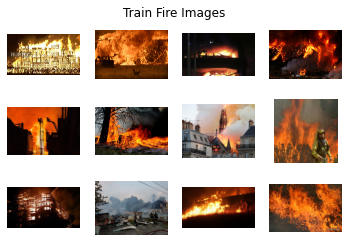

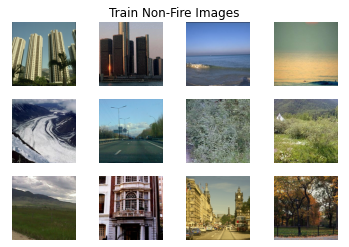

In [116]:
image_collage(train_dir_fire, 3, 4, 'Train Fire Images')
image_collage(train_dir_nofire, 3, 4, 'Train Non-Fire Images')

# Future direction 

Scrap data in the following categories: 

- Highway fire, road fire  
- Night road, night city, night forest, night mountain 
